Author: Amir Montazeri

# Library Import

In [1]:
#importing libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Task 1**
Importing *Census Income Dataset* from [*UCI Machine Learning Repository*](https://archive.ics.uci.edu/dataset/2/adult)



In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG



---


# **Task 2**
Taking quick look at the data structure

In [5]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [7]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
X.shape

(48842, 14)

**Task 2.1:**
Plotting histogram of the data. Histogram for Integer type data, and Bar chart for Categorical type data

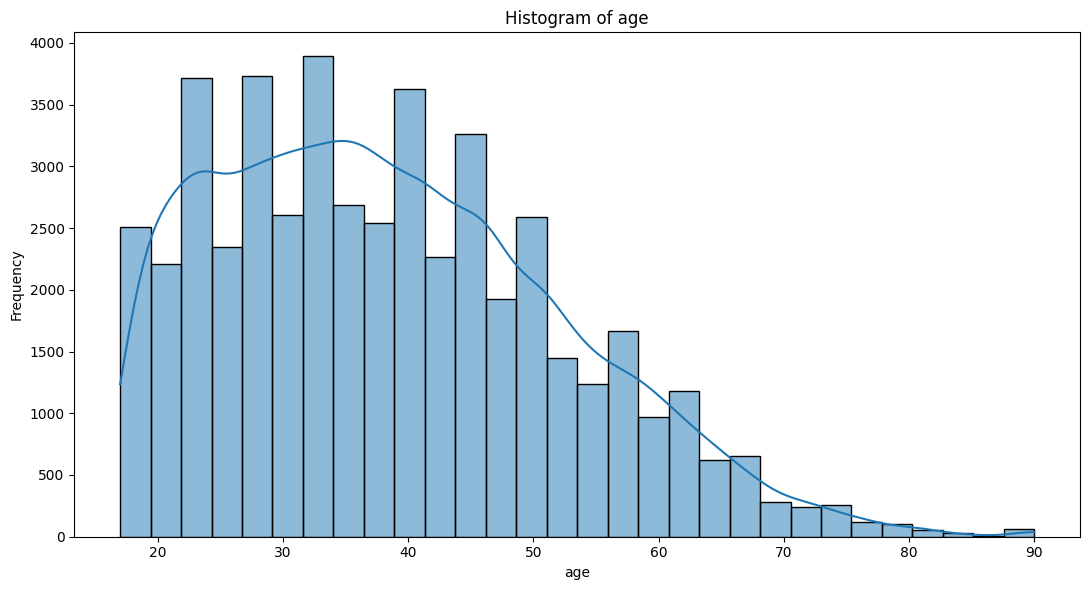

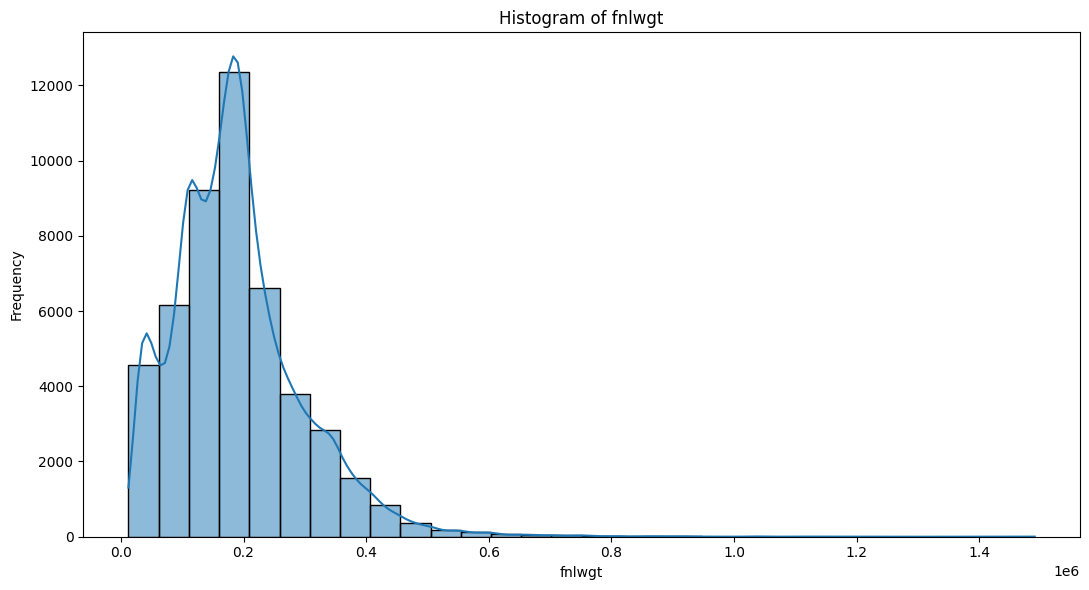

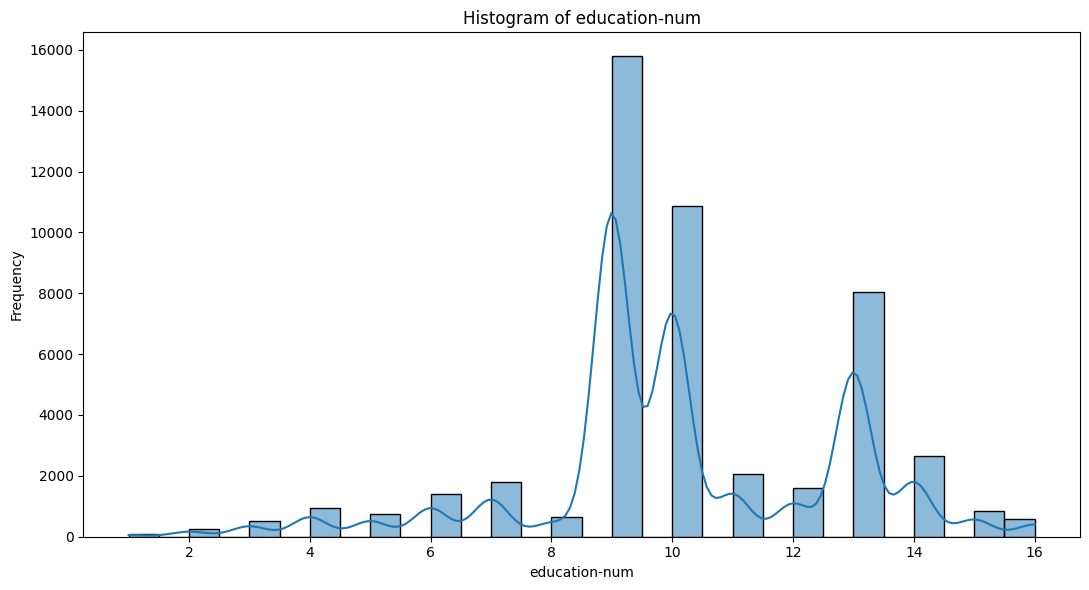

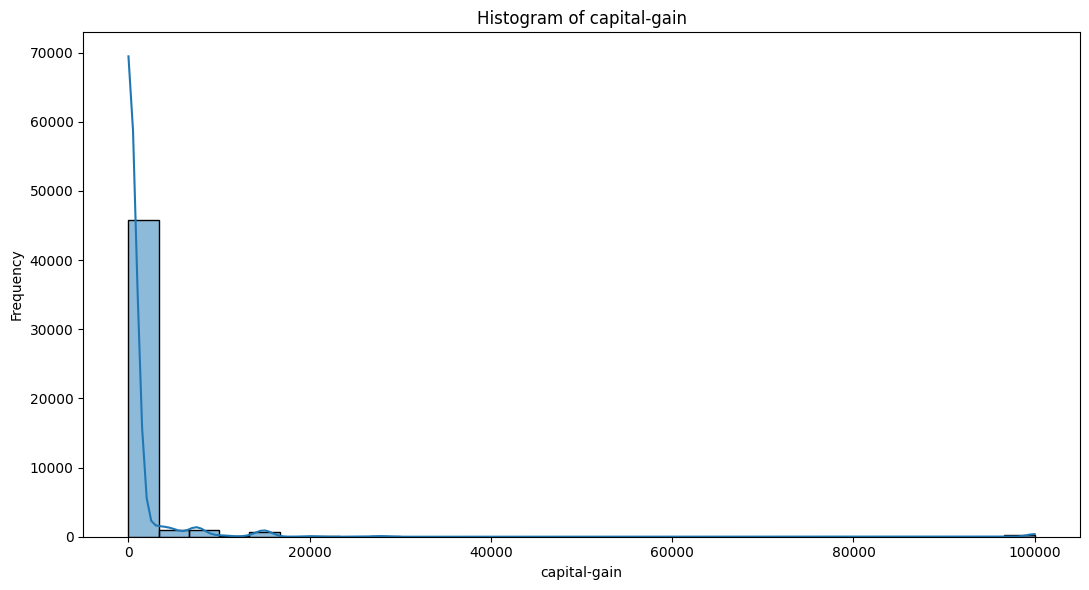

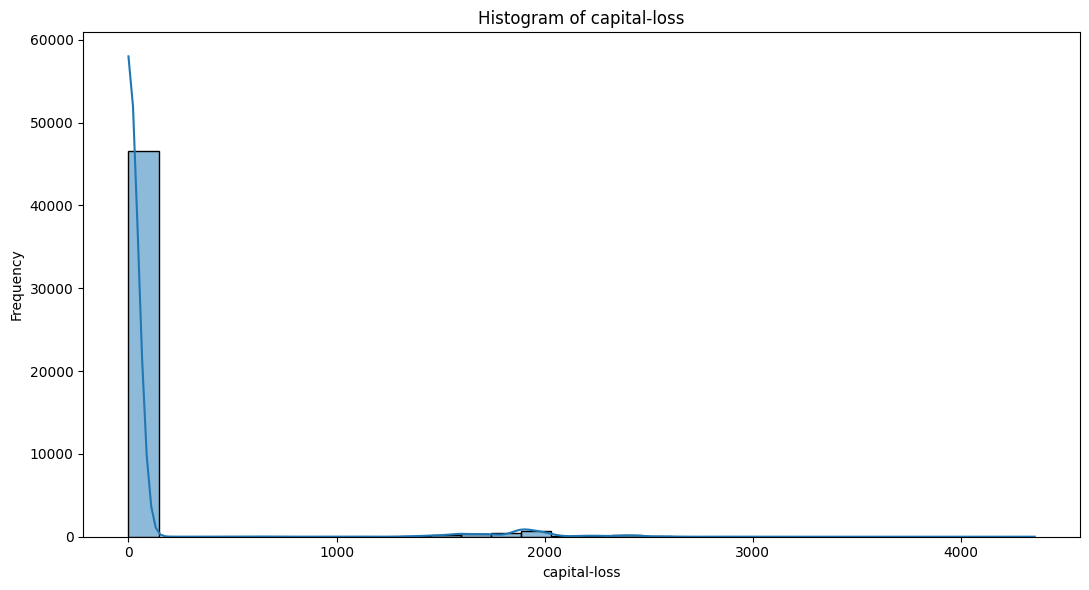

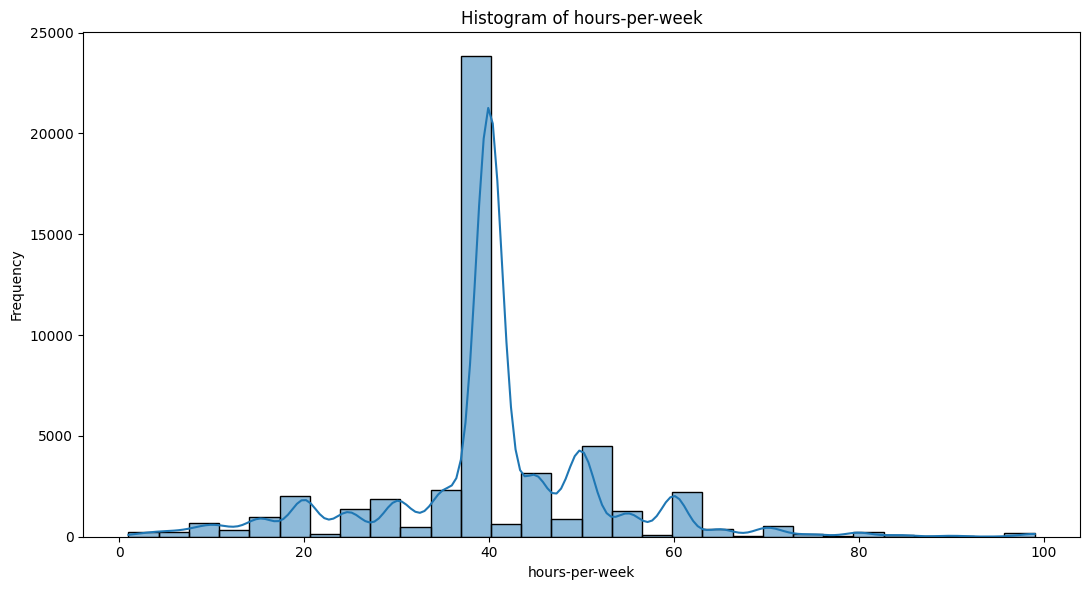

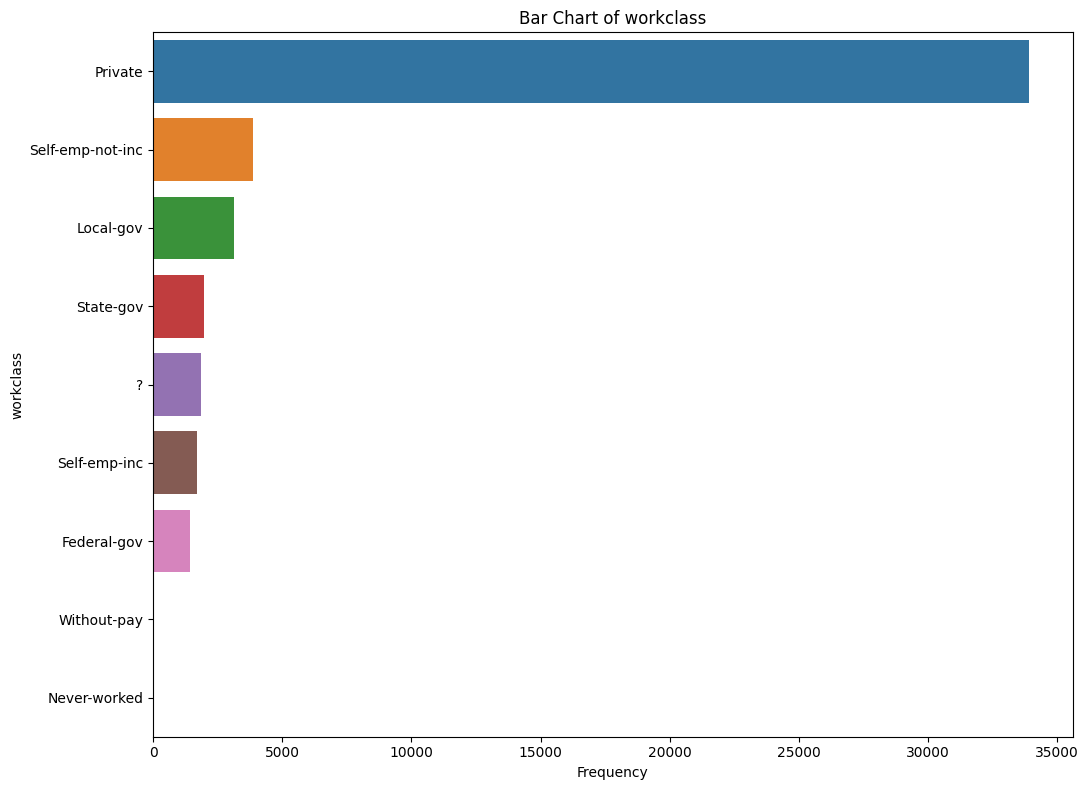

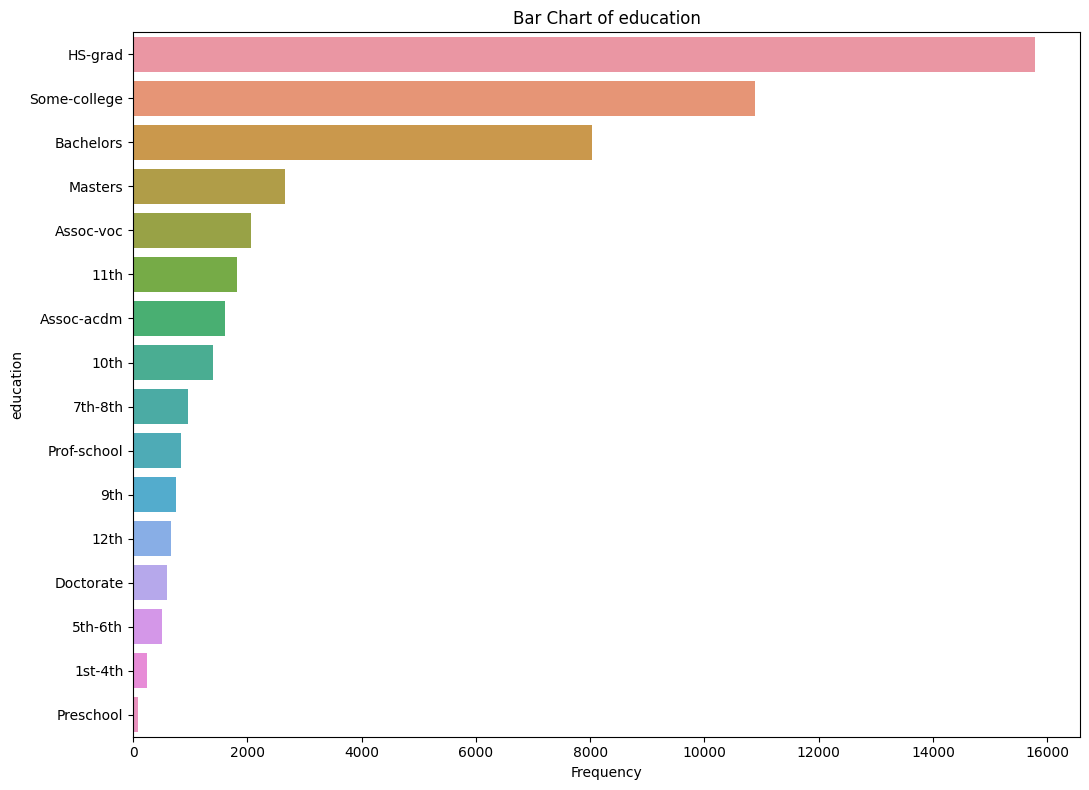

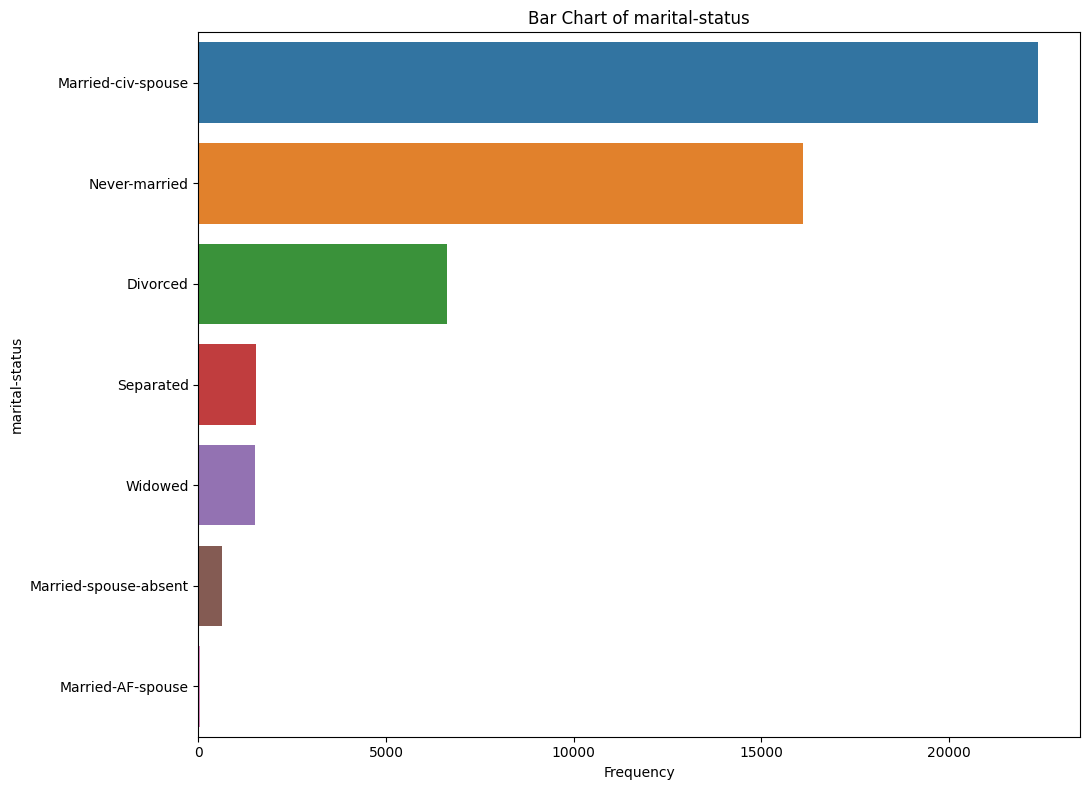

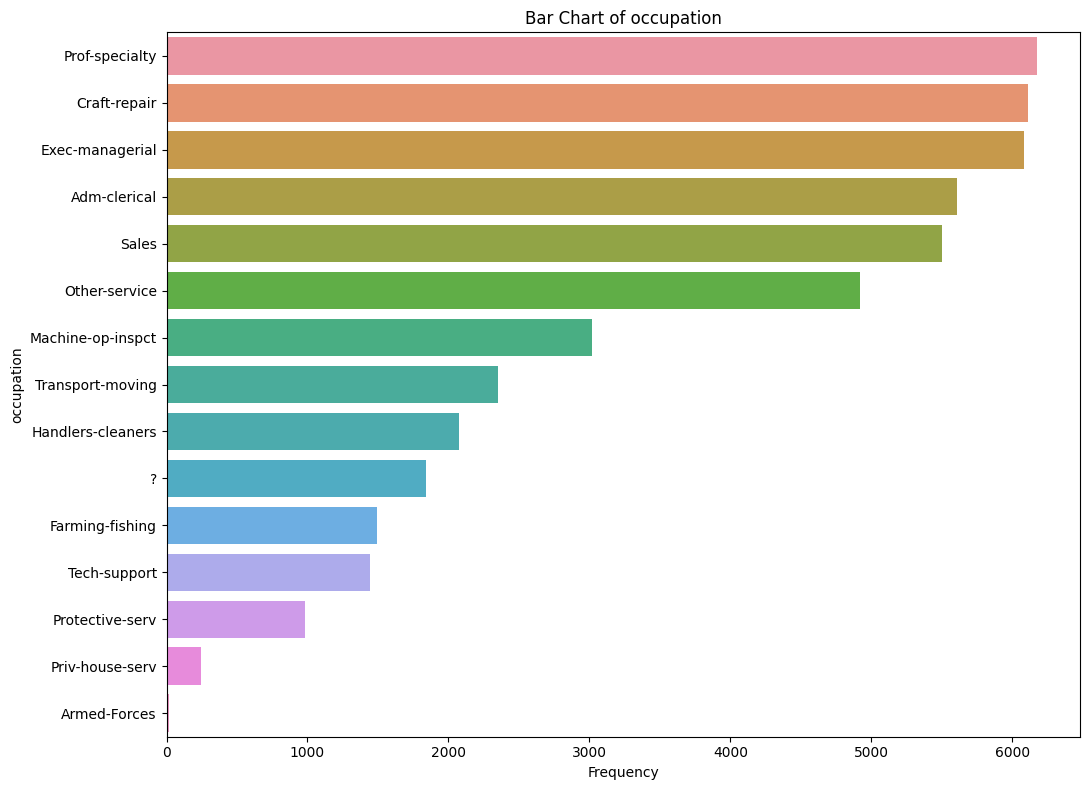

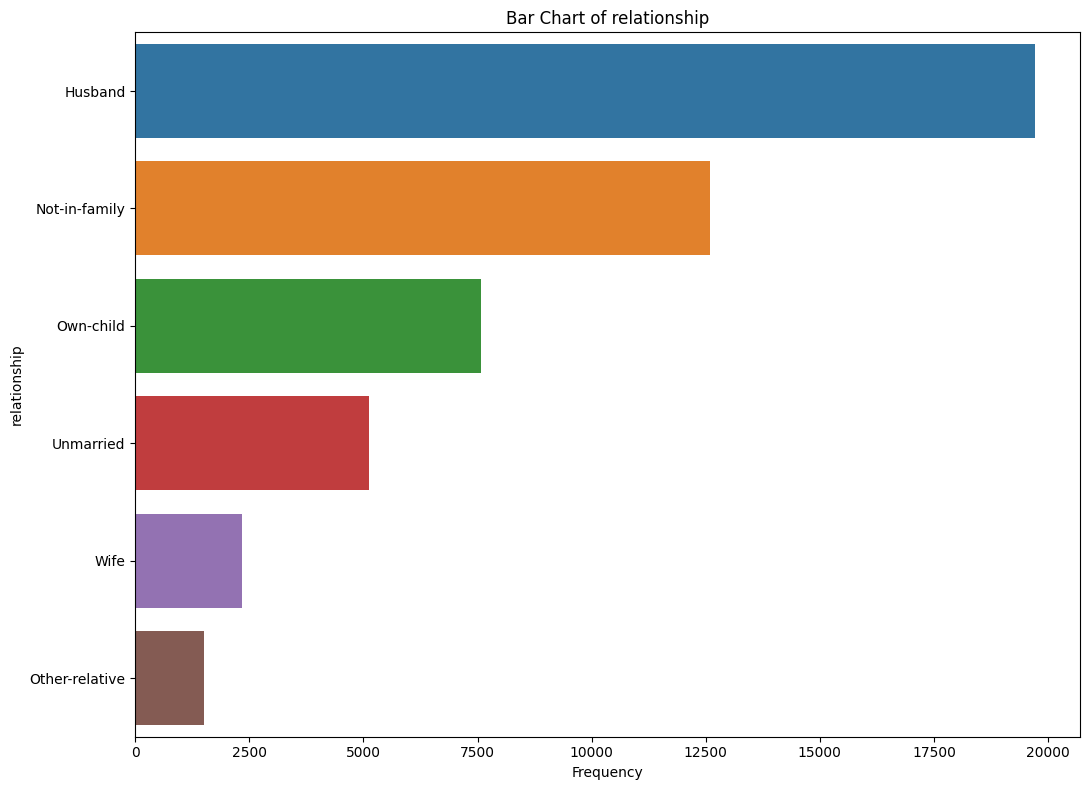

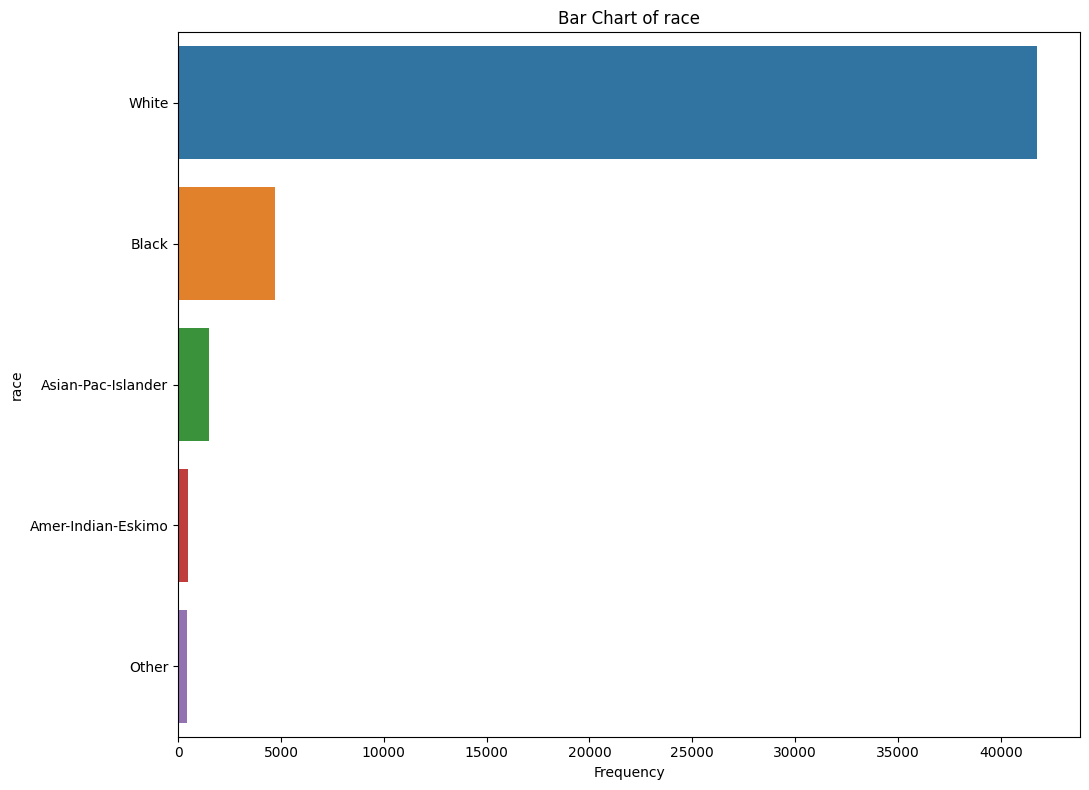

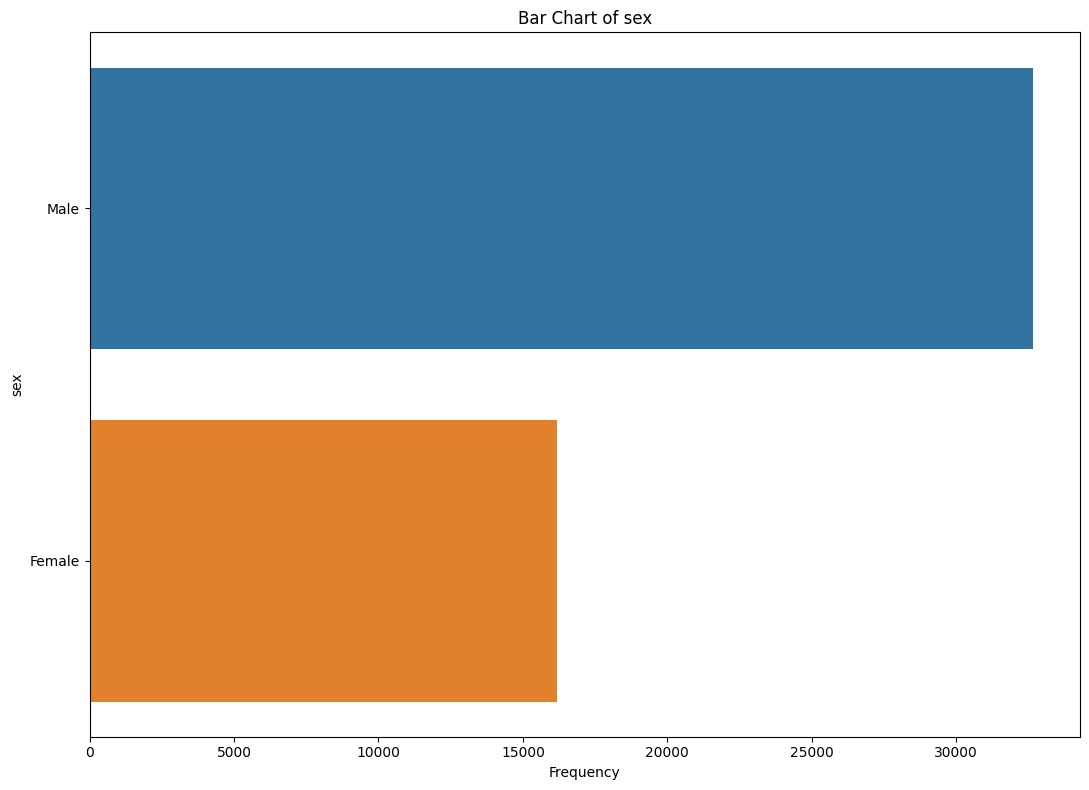

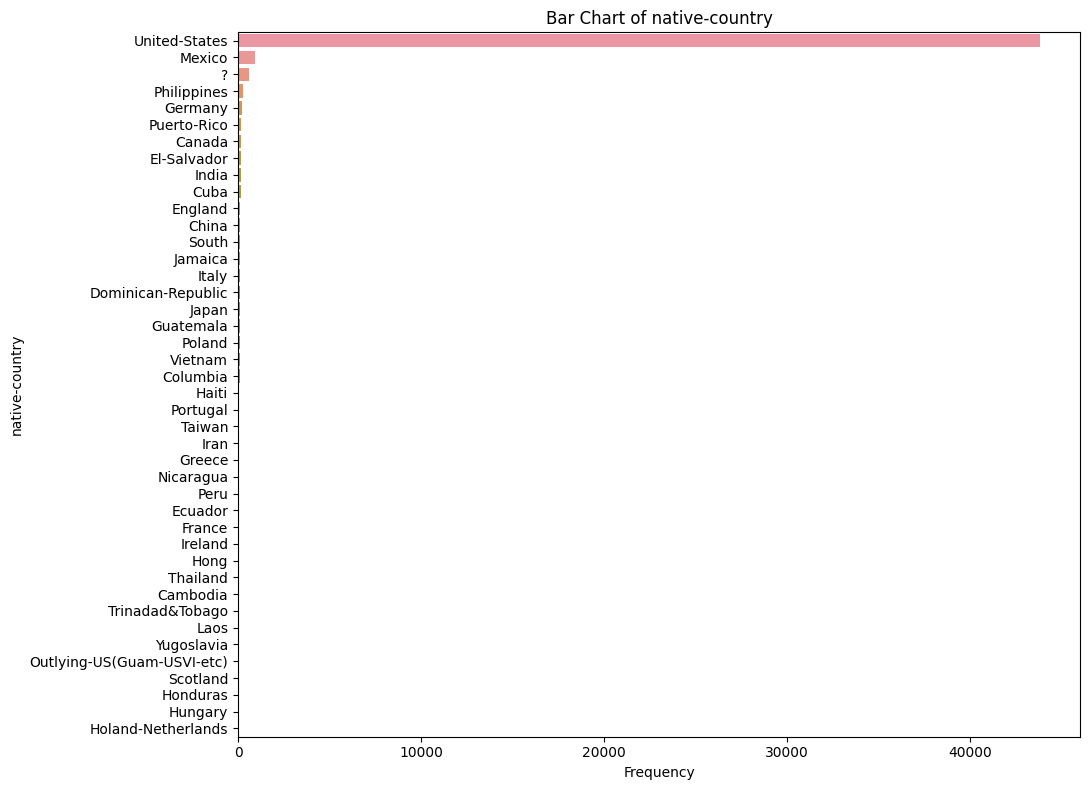

In [9]:
# Identifying integer columns in the DataFrame
integer_columns = X.select_dtypes(include=['int', 'int64']).columns

# Plotting histograms for integer type columns
for column in integer_columns:
    plt.figure(figsize=(11, 6))                   # Adjusting figure size for better aesthetics
    sns.histplot(X[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()                            # Adjustint the plot to ensure everything fits without overlapping
    plt.show()

# Identifying categorical columns in the DataFrame
categorical_columns = X.select_dtypes(include=['object', 'category']).columns

# Plotting bar charts for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(11, 8))
    sns.countplot(y=X[column], order=X[column].value_counts().index)
    plt.title(f'Bar Chart of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()




---


# **Task 3**
Counting the missing values in each feature

In [10]:
# Count the occurrences of '?' in each column of X
missing_values = (X == '?').sum()

# Display the number of '?' (missing values) in each column
print(missing_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
dtype: int64


#**Task 4**
 Replacing the missing values with NaN to see all the non-null count

In [22]:
# Replace '?' with NaN
X.replace('?', np.nan)

# Displaying the non-null count for each column
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


#**Task 5**
Creating and applying preprocessing pipeline

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Defining the numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'int']).columns

# Defining the categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Creating a preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Creating a preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fitting and transforming the data using the pipeline
X_prepared = preprocessor.fit_transform(X)

# Displaying the pipeline
print("Pipeline: \n", preprocessor)

# Printing the shape of the prepared data
print("\nShape: ", X_prepared.shape)

Pipeline: 
 ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object'))])

Shape:  (48842, 105)


#**Task 6**
Checking the income value counts

In [13]:
# Check the value counts of the target variable 'income'
income_value_counts = y.value_counts()

# Display the value counts
print(income_value_counts)

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
dtype: int64


#**Task 7**
Removing period `.` at the end of `>50K.` and `<=50K.`

In [14]:
# Cleaning the 'income' column by removing the period
y_cleaned = y.replace({'<=50K.':'<=50K', '>50K.': '>50K'})


# Running value_counts again to see the distribution of the cleaned 'income' variatinos
cleaned_value_counts = y_cleaned.value_counts()

print(cleaned_value_counts)

income
<=50K     37155
>50K      11687
dtype: int64


#**Task 8**
Splitting the data into 80% training set and 20% testing set.

In [15]:
from sklearn.model_selection import train_test_split

# Splitting the data into 80% Training and 20% Testing sets from perprocessed features values (X_prepared)
# and cleaned income variations (y_cleaned)
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y_cleaned, test_size=0.2, random_state=42)


# Print the shapes of the training and testing data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(39073, 105) (9769, 105) (39073, 1) (9769, 1)


#**Task 9**
Training *SVM* model (SVC) to predict if the income of the adult exceeds 50K on the training set

In [16]:
from sklearn.svm import SVC

# Defining the SVM model with  kernel = poly | gamma = 1 | C =0.1
model_svm = SVC(kernel='poly', gamma=1, C=0.1)

# Fitting the model on the training data
model_svm.fit(X_train[:10000], y_train[:10000].values.ravel())


SVC(C=0.1, gamma=1, kernel='poly')

**Task 9.1:** Testing model on `X_Test` and reporting classification report on `y_test` and `y_predict`

In [17]:
from sklearn.metrics import classification_report

# Making predictions on the test set
y_pred = model_svm.predict(X_test)

# Generating the classification report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

       <=50K       0.87      0.89      0.88      7414
        >50K       0.63      0.58      0.60      2355

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.74      9769
weighted avg       0.81      0.82      0.81      9769



**Task 9.2:** Displaying *Confusion Matrix* of the test result

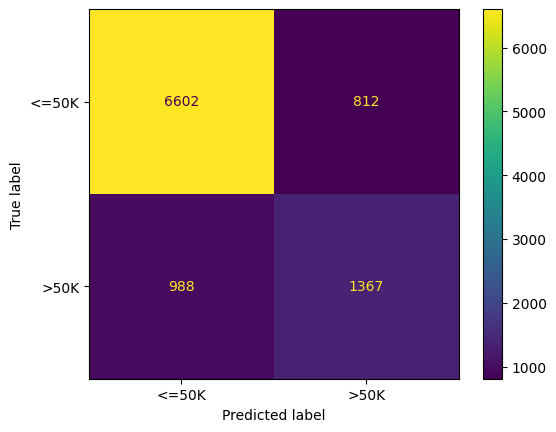

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

#**Task 10**
**Task 10.1:** Splitting the dataset into `60% training`, `20% validation`, and `20% testing`

In [19]:
from sklearn.model_selection import train_test_split


# First splitting the data into 60% train and 40% temporary data (validation + test)
X_train, X_validation_test, y_train, y_validation_test = train_test_split(
    X_prepared, y_cleaned, test_size=0.4, random_state=42
)

# Then spliting the temporary data into 50% validation and 50% test,
# which corresponds to 20% of the total data each
X_validation, X_test, y_validation, y_test = train_test_split(
    X_validation_test, y_validation_test, test_size=0.5, random_state=42
)

# Printing the shapes of the datasets
print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(29305, 105) (29305, 1) (9768, 105) (9768, 1) (9769, 105) (9769, 1)


**Task 10.2:** Using GridSearchCV to find the best value of kernel, gamma, and C and finding the winner parameter using `svm_winner`

In [21]:
# Retreieved from luisguiserrano

from sklearn.model_selection import GridSearchCV

svm_parameters = {
    'kernel' : ['rbf'],
    'C'      : [0.01, 0.1, 1, 10],
    'gamma'  : [0.01, 1, 10]
}
svm = SVC()
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)
svm_gs.fit(X_train[:10000], y_train[:10000].values.ravel())

best_params = svm_gs.best_params_
print('Best parameters found: ', best_params)
svm_winner = svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)

Best parameters found:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


0.8472563472563472